In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Q1:  How many rows and columns?
rows = len(df.axes[0])
columns = len(df.axes[1])
print(rows)
print(columns)
# Rows = 8,523, Columns = 12

8523
12


In [5]:
# Q1:  How many rows and columns?
df.shape
# Rows = 8,523, Columns = 12

(8523, 12)

In [6]:
# Q2:  What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Q2:  What are the datatypes of each variable?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Q3: Are there duplicates? (If so, drop any duplicates.)
df.duplicated().any()
# False = No duplicates

False

In [9]:
# Q4: Identify missing values
df.isnull().sum()
# Missing = Item Weight (1,463), Outlet Size (2410)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Q5: Decide on how to address the missing values and do it! 
#df1['Item_Weight'] = df.fillna(df['Item_Weight'].mean())
df1 = df.fillna(df['Item_Weight'].mean())
# df1.isnull().sum()
# Justification:  for Item Weight - Kept Item weight column and used mean.
# Would like to have found mean item weight by type (e.g., soda, meat, dairy)

In [11]:
# Q5: Decide on how to address the missing values and do it! 
df1 = df1.drop(columns = ['Outlet_Size'])
# Justification for Outlet Size:  Dropped column b/c did not seem critical
# Would like to have been able to better analyze data to better evaluate
# Both are beyond my skills at this point, but looking forward to learning more!

In [12]:
# Q6: Confirm that there are no missing values after addressing them.
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('LF','Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('low fat', 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace('reg', 'Regular')
df1['Item_Fat_Content'].value_counts()
# Looks good!

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Identifier'].value_counts()
#Looks good!

FDW13    10
FDG33    10
NCI54     9
DRE49     9
FDW26     9
         ..
FDN52     1
DRF48     1
FDQ60     1
FDK57     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [16]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Item_Type'].value_counts()
# Looks good!

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Identifier'].value_counts()
# Looks Good!

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [18]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Location_Type'].value_counts()
# Looks Good!

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
# Q7:  Find and fix any inconsistent categories of data 
# (example: fix cat, Cat, and cats so that they are consistent)
df1['Outlet_Type'].value_counts()
# OK, assiming that looks good, but could supermarket types be combined?

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
# Q8: For any numerical columns, obtain the (min, max, mean) for each
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [21]:
# Item Weight summary statistics
df1['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
# Item_Visibility summary statistics
df1['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [23]:
# Item_MRP summary statistics
df1['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [24]:
# Outlet_Establishment_Year summary statistics
df1['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Visualizations:
#1:  Heat Map:  I ended up starting with a head map to see where the data correlated, as a way to look for meaningful correlations to dig deeper into with further visualizations.  Result was a moderate correlation (r2 = 0.57) between 'Item MRP' and 'Item Outlet Sales.'  All other correlations were low, so decided to focus on the relationship between "Item MRP' and 'Item Outlet Sales.'


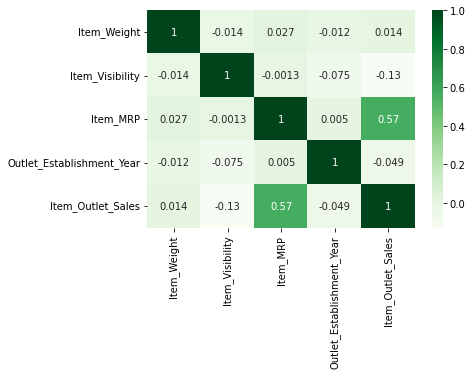

In [25]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True);

Heat Map:  I ended up starting with a head map to see how the data correlated, as a way to look areas to dig deeper into.  Result was a moderate correlation (r2 = 0.57) between 'Item MRP' and 'Item Outlet Sales.'  All other correlations were low, so decided to focus on the relationship between "Item MRP' and 'Item Outlet Sales,' but then realized that these were only the integer categories (so a bit less exciting than I first thought).

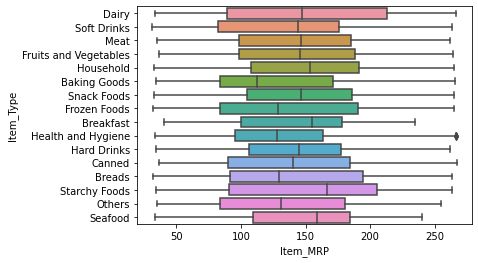

In [26]:
sns.boxplot(x = df['Item_MRP'], y = df['Item_Type']);

Hmmm... doesnt seem to tell me much, but at least I am able to start bringing in strings vs integers!

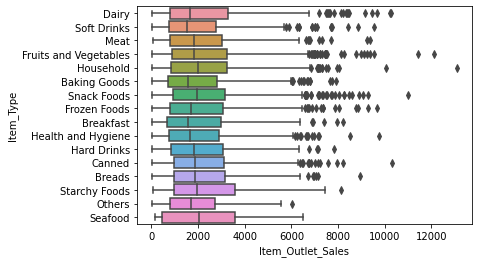

In [27]:
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Type']);

Rrrr....also doesnt tell me much!

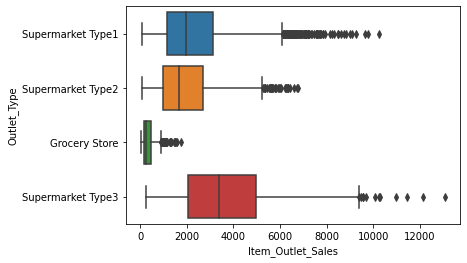

In [28]:
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Outlet_Type']);

Supermarket Type 3 has the largest median sales and largest distrubition



In [42]:
type3_filter = df['Outlet_Type'] == 'Supermarket Type3' 
type3 = df.loc[type3_filter, :]
len(df[type3_filter])

935

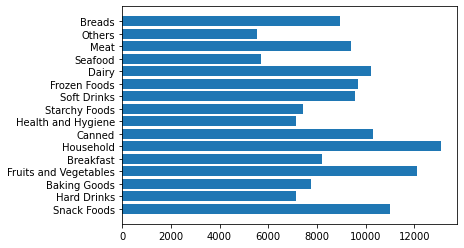

In [43]:
from matplotlib import pyplot as plt
plt.barh(type3['Item_Type'], type3['Item_Outlet_Sales']);

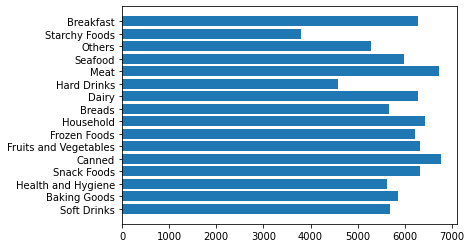

In [44]:
type2_filter = df['Outlet_Type'] == 'Supermarket Type2' 
type2 = df.loc[type2_filter, :]
len(df[type2_filter])

from matplotlib import pyplot as plt
plt.barh(type2['Item_Type'], type2['Item_Outlet_Sales']);

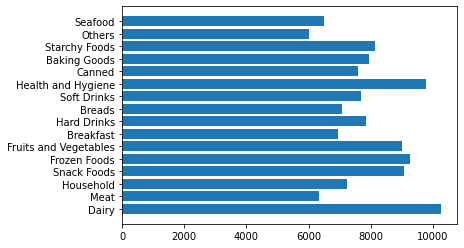

In [45]:
type1_filter = df['Outlet_Type'] == 'Supermarket Type1' 
type1 = df.loc[type1_filter, :]
len(df[type1_filter])

from matplotlib import pyplot as plt
plt.barh(type1['Item_Type'], type1['Item_Outlet_Sales']);

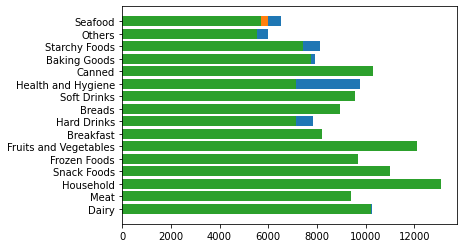

In [46]:
plt.barh(type1['Item_Type'], type1['Item_Outlet_Sales']);
plt.barh(type2['Item_Type'], type2['Item_Outlet_Sales']);
plt.barh(type3['Item_Type'], type3['Item_Outlet_Sales']);

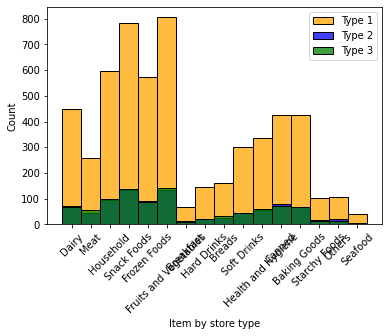

In [48]:
sns.histplot(type1['Item_Type'], color='orange', label = 'Type 1')
sns.histplot(type2['Item_Type'], color='blue', label = 'Type 2') 
sns.histplot(type3['Item_Type'], color='green', label = 'Type 3') 
plt.xlabel('Item by store type')
plt.xticks(rotation = 45)
plt.legend();

In [47]:
Another look at how much more Type 1 stores sell vs Type 2 and Type 1

Lots of graphs above to show my work, but below are the two most meaningful graphs re-run for clarity.

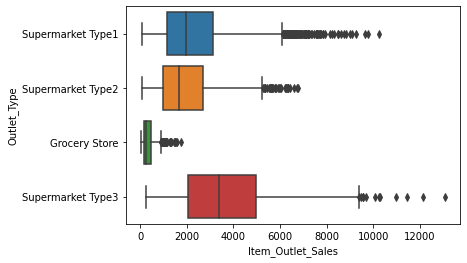

In [49]:
sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Outlet_Type']);

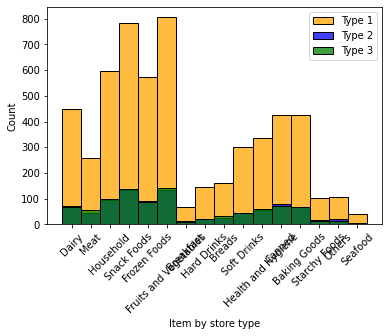

In [50]:
sns.histplot(type1['Item_Type'], color='orange', label = 'Type 1')
sns.histplot(type2['Item_Type'], color='blue', label = 'Type 2') 
sns.histplot(type3['Item_Type'], color='green', label = 'Type 3') 
plt.xlabel('Item by store type')
plt.xticks(rotation = 45)
plt.legend();